In [2]:
import numpy as np
import os
from tensorflow.keras.models import model_from_json
from pystoi.stoi import stoi
import mir_eval #https://github.com/craffel/mir_eval
import librosa
import tensorflow as tf
# import keras
from scipy.io import wavfile
# from pypesq import pesq #https://github.com/vBaiCai/python-pesq
# import vqmetrics
from natsort import natsorted
from tensorflow.keras.models import load_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pylab 
import soundfile as sf


In [3]:
#define reconstruct function to reconstruct sound from framed signal.
def reconstruct(wave,angle):
    recon = np.sqrt(np.power(10, wave))
    recon1 = recon*np.cos(angle)+recon*np.sin(angle)*1j
    recon = librosa.core.istft((recon1.T), hop_length=256, win_length=512, window='hann')
#     print(type(recon[0]))
    return recon
def change_order(first):
    sec=np.copy(first)
    sec=np.copy(first)
    sec[0] = first[5]
    sec[1] = first[4]
    sec[2] = first[3]
    sec[5] = first[2]
    sec[4] = first[1]
    sec[3] = first[0]
    return sec

In [3]:
import tensorflow as tf
import os
Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_36.json')),'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'models','model_36.h5')))
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


In [3]:
import tensorflow as tf
import os
Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_44.json')),'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'checkpoints','44','weights.01.hdf5')))
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


In [41]:
stoi_eval=[]
sdr=[]
stoi_mixed=[]
sdr_mixed=[]
mean_sdr=[]
mean_sdr_mixed=[]
mean_stoi=[]
mean_stoi_mixed=[]
# orig_path=os.getcwd()
Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
write_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff/test_data'
parent = 'results'
foldername = 'test'
# input_test = 'ftr_refrmd_test'
input_test = 'test_log2_norm2'
image = 'images'
inputs = os.listdir(os.path.normpath(os.path.join(write_path,input_test)))
inputs = natsorted(inputs)
mixed = os.listdir(os.path.normpath(os.path.join(write_path,'test_log2')))
mixed = natsorted(mixed)
clean1 = os.listdir(os.path.normpath(os.path.join(write_path,'test_log','clean')))
clean1 = natsorted(clean1)
clean = clean1.copy()
j=0
print(len(clean))
for i in range(len(inputs)-1):
    clean=np.concatenate((clean,clean1),axis=0)
phase = os.listdir(os.path.join(write_path,'test_phase2'))
phase = natsorted(phase)
if not os.path.exists(os.path.join(Data_path,parent,foldername)):
    os.makedirs(os.path.join(Data_path,parent,foldername))
if not os.path.exists(os.path.join(Data_path,parent,foldername,'pesq')):
#     print('creating pesq')
    os.makedirs(os.path.join(Data_path,parent,foldername,'pesq'))
if not os.path.exists(os.path.join(Data_path,parent,foldername,'sdr')):
    os.makedirs(os.path.join(Data_path,parent,foldername,'sdr'))
if not os.path.exists(os.path.join(Data_path,parent,foldername,'stoi')):
    os.makedirs(os.path.join(Data_path,parent,foldername,'stoi'))
for filename1,filename2,filename4 in zip(inputs,phase,mixed):
    print(filename1)
    print(filename2)
    print(filename4)
    a = os.listdir(os.path.join(write_path,input_test,filename1))
    b = os.listdir(os.path.join(write_path,'test_phase2',filename2))
    print('blah')
    c = os.listdir(os.path.join(write_path,'test_log2',filename4))
    stoi_eval=[]
    pesq_eval=[]
    sdr=[]
    stoi_mixed=[]
    sdr_mixed=[]
    if not os.path.exists(os.path.join(Data_path,parent,foldername,filename1)):
        os.mkdir(os.path.join(Data_path,parent,foldername,filename1))
    for filename11,filename22,filename33,filename44 in zip(a,b,clean,c):
        X_log=np.loadtxt(os.path.join(write_path,input_test,filename1,filename11),delimiter=',')
        X_phase=np.loadtxt(os.path.join(write_path,'test_phase2',filename2,filename22),delimiter=',')
        target = np.loadtxt(os.path.join(write_path,'test_log','clean',filename33),delimiter=',')
        framed_data=librosa.core.stft(target, n_fft=512, hop_length=256, win_length=512, window='hann')
        abslt=np.absolute(framed_data)**2
        dft_signal=np.log10(abslt+1e-7*np.ones(np.shape(abslt)))
        mixed_files=np.loadtxt(os.path.join(write_path,'test_log2',filename4,filename44),delimiter=',')
        prediction = loaded_model.predict(X_log)
        recon_out = reconstruct(prediction, X_phase)
        recon_mixed = reconstruct(mixed_files, X_phase)
        recon_clean = reconstruct(dft_signal.T, X_phase)
        sf.write(os.path.normpath(os.path.join(Data_path,parent,foldername,filename1)+'\\'+filename11.replace('.txt','')+'.wav'),recon_out,16000)
        target = target[0:len(recon_out)]

        #target = np.reshape(target,(1,len(recon_out)))
        #recon_out=np.reshape(recon_out,(1,len(recon_out)))
#         pesq_eval.append(get_pesq(target, recon_out,16000))
        sdr.append(mir_eval.separation.bss_eval_sources(target, recon_out, compute_permutation=False)[0][0])
        stoi_eval.append(stoi(target, recon_out, 16000, extended=False))
        sdr_mixed.append(mir_eval.separation.bss_eval_sources(target, recon_mixed, compute_permutation=False)[0][0])
        stoi_mixed.append(stoi(target, recon_mixed, 16000, extended=False))
    mean_stoi.append(np.mean(stoi_eval))
    mean_stoi_mixed.append(np.mean(stoi_mixed))
    mean_sdr.append(np.mean(sdr))
    mean_sdr_mixed.append(np.mean(sdr_mixed))
mean_sdr2 = change_order(mean_sdr)
mean_stoi2 = change_order(mean_stoi)
mean_sdr_mixed2 = change_order(mean_sdr_mixed)
mean_stoi_mixed2 = change_order(mean_stoi_mixed)
np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'predictedsdr.txt',mean_sdr2, fmt='%1.4f')
np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'mixedsdr.txt',mean_sdr_mixed2, fmt='%1.4f')
np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'predictedstoi.txt',mean_stoi2, fmt='%1.4f')
np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'mixedstoi.txt',mean_stoi_mixed2, fmt='%1.4f')
if not os.path.exists(os.path.join(Data_path, parent, image, foldername)):
    os.makedirs(os.path.join(Data_path, parent, image, foldername))
plt.plot([-9,-6,-3,0,3,6], mean_sdr2, 'r-o', [-9,-6,-3,0,3,6], mean_sdr_mixed2, 'b-o')
plt.gca().legend(('pred','mix'))
x=[-9,-6,-3,0,3,6]

plt.show
plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'sdr.png')))
plt.close()
plt.plot([-9,-6,-3,0,3,6], mean_stoi2, 'r-o', [-9,-6,-3,0,3,6], mean_stoi_mixed2, 'b-o')
plt.gca().legend(('pred','mix'))

plt.show
plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'stoi.png')))
plt.close()
        

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\studies\\university\\thesis\\speech_separation_codes\\du16\\donesomestuff\\test_data\\test_log2_norm2'

In [28]:
mean_stoi_mixed

[0.6490065656370271,
 0.7207940089558972,
 0.7866405030576905,
 0.5752559945672273,
 0.5042776681376199,
 0.44009095247383945]

Loaded model from disk
44
12


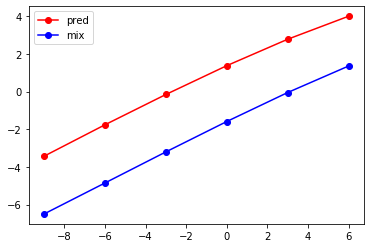

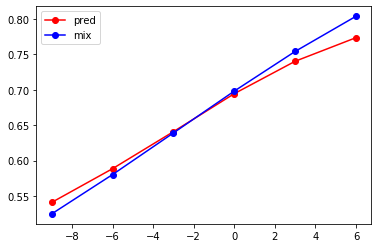

In [4]:
model_num= 44
ckpt_num= '03'
import tensorflow as tf
import os

Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
foldername = 'results_'+str(model_num)+'_2'
json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.json')),'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.h5')))
print("Loaded model from disk")
print(model_num)

# Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
# foldername = 'results_'+str(model_num)+'_3'
# json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.json')),'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.h5')))
# print("Loaded model from disk")
# print(model_num)

# import tensorflow as tf
# import os
# foldername = 'results_'+str(model_num)+'_ckpt'+ckpt_num
# Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
# json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.json')),'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'checkpoints',str(model_num),'weights.'+ckpt_num+'.hdf5')))
# print("Loaded model from disk")

stoi_eval=[]
sdr=[]
stoi_mixed=[]
sdr_mixed=[]
mean_sdr=[]
mean_sdr_mixed=[]
mean_stoi=[]
mean_stoi_mixed=[]
# orig_path=os.getcwd()
Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
write_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff/test_data'
parent = 'results'
# foldername = 'results_'+str(model_num)
# foldername = 'test'
foldername2 = 'recon_mixed'
# input_test = 'ftr_refrmd_test_w7_norm_withtrain'
input_test = 'test_log2_norm_withtrain'
image = 'images'
inputs = os.listdir(os.path.normpath(os.path.join(write_path,input_test)))
inputs = natsorted(inputs)
mixed = os.listdir(os.path.normpath(os.path.join(write_path,'test_log2')))
mixed = natsorted(mixed)
clean1 = os.listdir(os.path.normpath(os.path.join(write_path,'test_log','clean')))
clean1 = natsorted(clean1)
clean = clean1.copy()
j=0
print(len(clean))
for i in range(len(inputs)-1):
    clean=np.concatenate((clean,clean1),axis=0)
phase = os.listdir(os.path.join(write_path,'test_phase2'))
phase = natsorted(phase)
if not os.path.exists(os.path.join(Data_path,parent,foldername)):
    os.makedirs(os.path.join(Data_path,parent,foldername))
if not os.path.exists(os.path.join(Data_path,parent,foldername2)):
    os.makedirs(os.path.join(Data_path,parent,foldername2))
if not os.path.exists(os.path.join(Data_path,parent,foldername,'pesq')):
#     print('creating pesq')
    os.makedirs(os.path.join(Data_path,parent,foldername,'pesq'))
if not os.path.exists(os.path.join(Data_path,parent,foldername,'sdr')):
    os.makedirs(os.path.join(Data_path,parent,foldername,'sdr'))
if not os.path.exists(os.path.join(Data_path,parent,foldername,'stoi')):
    os.makedirs(os.path.join(Data_path,parent,foldername,'stoi'))
for filename1,filename2,filename4 in zip(inputs,phase,mixed):
#     print(filename1)
#     print(filename2)
#     print(filename4)
    a = os.listdir(os.path.join(write_path,input_test,filename1))
    b = os.listdir(os.path.join(write_path,'test_phase2',filename2))
    c = os.listdir(os.path.join(write_path,'test_log2',filename4))
    stoi_eval=[]
    pesq_eval=[]
    sdr=[]
    stoi_mixed=[]
    sdr_mixed=[]
    if not os.path.exists(os.path.join(Data_path,parent,foldername,filename1)):
        os.mkdir(os.path.join(Data_path,parent,foldername,filename1))
    if not os.path.exists(os.path.join(Data_path,parent,foldername2,filename1)):
        os.mkdir(os.path.join(Data_path,parent,foldername2,filename1))
    for filename11,filename22,filename33,filename44 in zip(a,b,clean,c):
        X_log=np.loadtxt(os.path.join(write_path,input_test,filename1,filename11),delimiter=',')
        X_phase=np.loadtxt(os.path.join(write_path,'test_phase2',filename2,filename22),delimiter=',')
        target = np.loadtxt(os.path.normpath(os.path.join(write_path,'test_log','clean',filename33)),dtype='float32',delimiter=',')
        framed_data=librosa.core.stft(target, n_fft=512, hop_length=256, win_length=512, window='hann')
        abslt=np.absolute(framed_data)**2
        dft_signal=np.log10(abslt+(1e-7*np.ones(np.shape(abslt))))
        mixed_files=np.loadtxt(os.path.join(write_path,'test_log2',filename4,filename44),delimiter=',')
        prediction = loaded_model.predict(X_log)
        recon_out = reconstruct(prediction, X_phase)
        recon_mixed = reconstruct(mixed_files, X_phase)
        recon_clean = reconstruct(dft_signal.T, X_phase)
        sf.write(os.path.normpath(os.path.join(Data_path,parent,foldername,filename1)+'\\'+filename11.replace('.txt','')+'.wav'),recon_out,16000)
        target = target[0:len(recon_out)]
        #target = np.reshape(target,(1,len(recon_out)))
        #recon_out=np.reshape(recon_out,(1,len(recon_out)))
#         pesq_eval.append(get_pesq(target, recon_out,16000))
        sdr.append(mir_eval.separation.bss_eval_sources(target, recon_out, compute_permutation=False)[0][0])
        stoi_eval.append(stoi(target, recon_out, 16000, extended=False))
        sdr_mixed.append(mir_eval.separation.bss_eval_sources(target, recon_mixed, compute_permutation=False)[0][0])
        stoi_mixed.append(stoi(target, recon_mixed, 16000, extended=False))
        sf.write(os.path.normpath(os.path.join(Data_path,parent,foldername2,filename1)+'\\'+filename11.replace('.txt','')+'.wav'),recon_mixed,16000)
        sf.write(os.path.normpath(os.path.join(Data_path,parent,foldername2,'clean')+'\\'+filename11.replace('.txt','')+'.wav'),target,16000)
    mean_stoi.append(np.mean(stoi_eval))
    mean_stoi_mixed.append(np.mean(stoi_mixed))
    mean_sdr.append(np.mean(sdr))
    mean_sdr_mixed.append(np.mean(sdr_mixed))
mean_sdr2 = change_order(mean_sdr)
mean_stoi2 = change_order(mean_stoi)
mean_sdr_mixed2 = change_order(mean_sdr_mixed)
mean_stoi_mixed2 = change_order(mean_stoi_mixed)
np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'predictedsdr.txt',mean_sdr2, fmt='%1.4f')
np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'mixedsdr.txt',mean_sdr_mixed2, fmt='%1.4f')
np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'predictedstoi.txt',mean_stoi2, fmt='%1.4f')
np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'mixedstoi.txt',mean_stoi_mixed2, fmt='%1.4f')
if not os.path.exists(os.path.join(Data_path, parent, image, foldername)):
    os.makedirs(os.path.join(Data_path, parent, image, foldername))
plt.plot([-9,-6,-3,0,3,6], mean_sdr2, 'r-o', [-9,-6,-3,0,3,6], mean_sdr_mixed2, 'b-o')
plt.gca().legend(('pred','mix'))
x=[-9,-6,-3,0,3,6]

plt.show()
plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'sdr.png')))
plt.close()
plt.plot([-9,-6,-3,0,3,6], mean_stoi2, 'r-o', [-9,-6,-3,0,3,6], mean_stoi_mixed2, 'b-o')
plt.gca().legend(('pred','mix'))

plt.show()
plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'stoi.png')))
plt.close()

In [44]:
mean_stoi_mixed2

array([0.46245345, 0.5351304 , 0.61420762, 0.69387352, 0.76800348,
       0.83232713])

In [8]:
for model_num in range(45,53):
    ckpt_num= '03'
    import tensorflow as tf
    import os

    Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
    foldername = 'results_'+str(model_num)+'_test'
    json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.json')),'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = tf.keras.models.model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.h5')))
    print("Loaded model from disk")
    print(model_num)

    # Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
    # foldername = 'results_'+str(model_num)+'_3'
    # json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.json')),'r')
    # loaded_model_json = json_file.read()
    # json_file.close()
    # loaded_model = tf.keras.models.model_from_json(loaded_model_json)
    # # load weights into new model
    # loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.h5')))
    # print("Loaded model from disk")
    # print(model_num)

    # import tensorflow as tf
    # import os
    # foldername = 'results_'+str(model_num)+'_ckpt'+ckpt_num
    # Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
    # json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.json')),'r')
    # loaded_model_json = json_file.read()
    # json_file.close()
    # loaded_model = tf.keras.models.model_from_json(loaded_model_json)
    # # load weights into new model
    # loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'checkpoints',str(model_num),'weights.'+ckpt_num+'.hdf5')))
    # print("Loaded model from disk")

    stoi_eval=[]
    sdr=[]
    stoi_mixed=[]
    sdr_mixed=[]
    mean_sdr=[]
    mean_sdr_mixed=[]
    mean_stoi=[]
    mean_stoi_mixed=[]
    # orig_path=os.getcwd()
    Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
    write_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff/test_data2'
    parent = 'results'
    # foldername = 'results_'+str(model_num)
    # foldername = 'test'
#     input_test = 'ftr_refrmd_test_w7_norm2'
    input_test = 'test_log2_norm2'
    image = 'images'
    inputs = os.listdir(os.path.normpath(os.path.join(write_path,input_test)))
    inputs = natsorted(inputs)
    mixed = os.listdir(os.path.normpath(os.path.join(write_path,'test_log2')))
    mixed = natsorted(mixed)
    clean1 = os.listdir(os.path.normpath(os.path.join(write_path,'test_log','clean')))
    clean1 = natsorted(clean1)
    clean = clean1.copy()
    j=0
    print(len(clean))
    for i in range(len(inputs)-1):
        clean=np.concatenate((clean,clean1),axis=0)
    phase = os.listdir(os.path.join(write_path,'test_phase2'))
    phase = natsorted(phase)
    if not os.path.exists(os.path.join(Data_path,parent,foldername)):
        os.makedirs(os.path.join(Data_path,parent,foldername))
    if not os.path.exists(os.path.join(Data_path,parent,foldername,'pesq')):
    #     print('creating pesq')
        os.makedirs(os.path.join(Data_path,parent,foldername,'pesq'))
    if not os.path.exists(os.path.join(Data_path,parent,foldername,'sdr')):
        os.makedirs(os.path.join(Data_path,parent,foldername,'sdr'))
    if not os.path.exists(os.path.join(Data_path,parent,foldername,'stoi')):
        os.makedirs(os.path.join(Data_path,parent,foldername,'stoi'))
    for filename1,filename2,filename4 in zip(inputs,phase,mixed):
        print(filename1)
        print(filename2)
        print(filename4)
        a = os.listdir(os.path.join(write_path,input_test,filename1))
        b = os.listdir(os.path.join(write_path,'test_phase2',filename2))
        print('blah')
        c = os.listdir(os.path.join(write_path,'test_log2',filename4))
        stoi_eval=[]
        pesq_eval=[]
        sdr=[]
        stoi_mixed=[]
        sdr_mixed=[]
        if not os.path.exists(os.path.join(Data_path,parent,foldername,filename1)):
            os.mkdir(os.path.join(Data_path,parent,foldername,filename1))
        for filename11,filename22,filename33,filename44 in zip(a,b,clean,c):
            X_log=np.loadtxt(os.path.join(write_path,input_test,filename1,filename11),delimiter=',')
            X_phase=np.loadtxt(os.path.join(write_path,'test_phase2',filename2,filename22),delimiter=',')
            target = np.loadtxt(os.path.normpath(os.path.join(write_path,'test_log','clean',filename33)),dtype='float32',delimiter=',')
            framed_data=librosa.core.stft(target, n_fft=512, hop_length=256, win_length=512, window='hann')
            abslt=np.absolute(framed_data)**2
            dft_signal=np.log10(abslt+(1e-7*np.ones(np.shape(abslt))))
            mixed_files=np.loadtxt(os.path.join(write_path,'test_log2',filename4,filename44),delimiter=',')
            prediction = loaded_model.predict(X_log)
            recon_out = reconstruct(prediction, X_phase)
            recon_mixed = reconstruct(mixed_files, X_phase)
            recon_clean = reconstruct(dft_signal.T, X_phase)
            sf.write(os.path.normpath(os.path.join(Data_path,parent,foldername,filename1)+'\\'+filename11.replace('.txt','')+'.wav'),recon_out,16000)
            target = target[0:len(recon_out)]
            #target = np.reshape(target,(1,len(recon_out)))
            #recon_out=np.reshape(recon_out,(1,len(recon_out)))
    #         pesq_eval.append(get_pesq(target, recon_out,16000))
            sdr.append(mir_eval.separation.bss_eval_sources(target, recon_out, compute_permutation=False)[0][0])
            stoi_eval.append(stoi(target, recon_out, 16000, extended=False))
            sdr_mixed.append(mir_eval.separation.bss_eval_sources(target, recon_mixed, compute_permutation=False)[0][0])
            stoi_mixed.append(stoi(target, recon_mixed, 16000, extended=False))
        mean_stoi.append(np.mean(stoi_eval))
        mean_stoi_mixed.append(np.mean(stoi_mixed))
        mean_sdr.append(np.mean(sdr))
        mean_sdr_mixed.append(np.mean(sdr_mixed))
    mean_sdr2 = change_order(mean_sdr)
    mean_stoi2 = change_order(mean_stoi)
    mean_sdr_mixed2 = change_order(mean_sdr_mixed)
    mean_stoi_mixed2 = change_order(mean_stoi_mixed)
    np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'predictedsdr.txt',mean_sdr2, fmt='%1.4f')
    np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'mixedsdr.txt',mean_sdr_mixed2, fmt='%1.4f')
    np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'predictedstoi.txt',mean_stoi2, fmt='%1.4f')
    np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'mixedstoi.txt',mean_stoi_mixed2, fmt='%1.4f')
    if not os.path.exists(os.path.join(Data_path, parent, image, foldername)):
        os.makedirs(os.path.join(Data_path, parent, image, foldername))
    plt.plot([-9,-6,-3,0,3,6], mean_sdr2, 'r-o', [-9,-6,-3,0,3,6], mean_sdr_mixed2, 'b-o')
    plt.gca().legend(('pred','mix'))
    x=[-9,-6,-3,0,3,6]

    plt.show
    plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'sdr.png')))
    plt.close()
    plt.plot([-9,-6,-3,0,3,6], mean_stoi2, 'r-o', [-9,-6,-3,0,3,6], mean_stoi_mixed2, 'b-o')
    plt.gca().legend(('pred','mix'))

    plt.show
    plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'stoi.png')))
    plt.close()

Loaded model from disk
45
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah
Loaded model from disk
46
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah
Loaded model from disk
47
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah
Loaded model from disk
48
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah
Loaded model from disk
49
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah
Loaded model from disk
50
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah
Loaded model from disk
51
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah
Loaded model from disk
52
6
0
0
0
blah
3
3
3
blah
6
6
6
blah
m3
m3
m3
blah
m6
m6
m6
blah
m9
m9
m9
blah


In [11]:
model_num= 45
for ckpt_num in range(1,50):
    import tensorflow as tf
    import os
    foldername = 'results_'+str(model_num)+'_ckpt'+str(ckpt_num).zfill(2)
    Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
    json_file = open(os.path.normpath(os.path.join(Data_path,'models','model_'+str(model_num)+'.json')),'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = tf.keras.models.model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(os.path.normpath(os.path.join(Data_path,'checkpoints',str(model_num),'weights.'+str(ckpt_num).zfill(2)+'.hdf5')))
    print("Loaded model from disk")

    stoi_eval=[]
    sdr=[]
    stoi_mixed=[]
    sdr_mixed=[]
    mean_sdr=[]
    mean_sdr_mixed=[]
    mean_stoi=[]
    mean_stoi_mixed=[]
    # orig_path=os.getcwd()
    Data_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff'
    write_path = 'D:/studies/university/thesis/speech_separation_codes/du16/donesomestuff/test_data2'
    parent = 'results'
    # foldername = 'results_'+str(model_num)
    # foldername = 'test'
    # input_test = 'ftr_refrmd_test_norm'
    input_test = 'ftr_refrmd_test_w7_norm'
    image = 'images'
    inputs = os.listdir(os.path.normpath(os.path.join(write_path,input_test)))
    inputs = natsorted(inputs)
    mixed = os.listdir(os.path.normpath(os.path.join(write_path,'test_log2')))
    mixed = natsorted(mixed)
    clean1 = os.listdir(os.path.normpath(os.path.join(write_path,'test_log','clean')))
    clean1 = natsorted(clean1)
    clean = clean1.copy()
    j=0
    print(len(clean))
    for i in range(len(inputs)-1):
        clean=np.concatenate((clean,clean1),axis=0)
    phase = os.listdir(os.path.join(write_path,'test_phase2'))
    phase = natsorted(phase)
    if not os.path.exists(os.path.join(Data_path,parent,foldername)):
        os.makedirs(os.path.join(Data_path,parent,foldername))
    if not os.path.exists(os.path.join(Data_path,parent,foldername,'pesq')):
    #     print('creating pesq')
        os.makedirs(os.path.join(Data_path,parent,foldername,'pesq'))
    if not os.path.exists(os.path.join(Data_path,parent,foldername,'sdr')):
        os.makedirs(os.path.join(Data_path,parent,foldername,'sdr'))
    if not os.path.exists(os.path.join(Data_path,parent,foldername,'stoi')):
        os.makedirs(os.path.join(Data_path,parent,foldername,'stoi'))
    for filename1,filename2,filename4 in zip(inputs,phase,mixed):
        print(filename1)
        print(filename2)
        print(filename4)
        a = os.listdir(os.path.join(write_path,input_test,filename1))
        b = os.listdir(os.path.join(write_path,'test_phase2',filename2))
        print('blah')
        c = os.listdir(os.path.join(write_path,'test_log2',filename4))
        stoi_eval=[]
        pesq_eval=[]
        sdr=[]
        stoi_mixed=[]
        sdr_mixed=[]
        if not os.path.exists(os.path.join(Data_path,parent,foldername,filename1)):
            os.mkdir(os.path.join(Data_path,parent,foldername,filename1))
        for filename11,filename22,filename33,filename44 in zip(a,b,clean,c):
            X_log=np.loadtxt(os.path.join(write_path,input_test,filename1,filename11),delimiter=',')
            X_phase=np.loadtxt(os.path.join(write_path,'test_phase2',filename2,filename22),delimiter=',')
            target = np.loadtxt(os.path.normpath(os.path.join(write_path,'test_log','clean',filename33)),dtype='float32',delimiter=',')
            framed_data=librosa.core.stft(target, n_fft=512, hop_length=256, win_length=512, window='hann')
            abslt=np.absolute(framed_data)**2
            dft_signal=np.log10(abslt+(1e-7*np.ones(np.shape(abslt))))
            mixed_files=np.loadtxt(os.path.join(write_path,'test_log2',filename4,filename44),delimiter=',')
            prediction = loaded_model.predict(X_log)
            recon_out = reconstruct(prediction, X_phase)
            recon_mixed = reconstruct(mixed_files, X_phase)
            recon_clean = reconstruct(dft_signal.T, X_phase)
#             sf.write(os.path.normpath(os.path.join(Data_path,parent,foldername,filename1)+'\\'+filename11.replace('.txt','')+'.wav'),recon_out,16000)
            target = target[0:len(recon_out)]
            #target = np.reshape(target,(1,len(recon_out)))
            #recon_out=np.reshape(recon_out,(1,len(recon_out)))
    #         pesq_eval.append(get_pesq(target, recon_out,16000))
            sdr.append(mir_eval.separation.bss_eval_sources(target, recon_out, compute_permutation=False)[0][0])
            stoi_eval.append(stoi(target, recon_out, 16000, extended=False))
            sdr_mixed.append(mir_eval.separation.bss_eval_sources(target, recon_mixed, compute_permutation=False)[0][0])
            stoi_mixed.append(stoi(target, recon_mixed, 16000, extended=False))
        mean_stoi.append(np.mean(stoi_eval))
        mean_stoi_mixed.append(np.mean(stoi_mixed))
        mean_sdr.append(np.mean(sdr))
        mean_sdr_mixed.append(np.mean(sdr_mixed))
    mean_sdr2 = change_order(mean_sdr)
    mean_stoi2 = change_order(mean_stoi)
    mean_sdr_mixed2 = change_order(mean_sdr_mixed)
    mean_stoi_mixed2 = change_order(mean_stoi_mixed)
    np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'predictedsdr.txt',mean_sdr2, fmt='%1.4f')
    np.savetxt(os.path.join(Data_path,parent,foldername,'sdr')+'\\'+'mixedsdr.txt',mean_sdr_mixed2, fmt='%1.4f')
    np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'predictedstoi.txt',mean_stoi2, fmt='%1.4f')
    np.savetxt(os.path.join(Data_path,parent,foldername,'stoi')+'\\'+'mixedstoi.txt',mean_stoi_mixed2, fmt='%1.4f')
    if not os.path.exists(os.path.join(Data_path, parent, image, foldername)):
        os.makedirs(os.path.join(Data_path, parent, image, foldername))
    plt.plot([-9,-6,-3,0,3,6], mean_sdr2, 'r-o', [-9,-6,-3,0,3,6], mean_sdr_mixed2, 'b-o')
    plt.gca().legend(('pred','mix'))
    x=[-9,-6,-3,0,3,6]

    plt.show
    plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'sdr.png')))
    plt.close()
    plt.plot([-9,-6,-3,0,3,6], mean_stoi2, 'r-o', [-9,-6,-3,0,3,6], mean_stoi_mixed2, 'b-o')
    plt.gca().legend(('pred','mix'))

    plt.show
    plt.savefig(os.path.normpath(os.path.join(Data_path, parent, image, foldername, 'stoi.png')))
    plt.close()

Loaded model from disk
6
0
0
0
blah


ValueError: Error when checking input: expected dropout_15_input to have shape (257,) but got array with shape (1799,)

In [13]:
def get_pesq(reference, degraded, sample_rate=None, program='pesq'):
    """ Return PESQ quality estimation (two values: PESQ MOS and MOS LQO) based
    on reference and degraded speech samples comparison.
    Sample rate must be 8000 or 16000 (or can be defined reading reference file
    header).
    PESQ utility must be installed.
    """
    if not os.path.isfile(reference) or not os.path.isfile(degraded):
        raise ValueError('reference or degraded file does not exist')
    if not sample_rate:
        import wave
        w = wave.open(reference, 'r')
        sample_rate = w.getframerate()
        w.close()
    if sample_rate not in (8000, 16000):
        raise ValueError('sample rate must be 8000 or 16000')
    import subprocess
    args = [ program, '+%d' % sample_rate, reference, degraded  ]
    pipe = subprocess.Popen(args, stdout=subprocess.PIPE)
    out, _ = pipe.communicate()
    last_line = out.split('\n')[-2]
    if not last_line.startswith('P.862 Prediction'):
        raise ValueError(last_line)
    return tuple(map(float, last_line.split()[-2:]))

In [19]:
import sounddevice as sd
sd.play(target,16000)

In [10]:
sd.play(recon_out,16000)

In [20]:
sd.play(recon_mixed,16000)

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
loaded_model.get_weights()[7].shape

In [2]:
tf.__version__

'1.13.1'